# Assignment Part-I Task-3

Name: Michael Merrick  SID: 44849354

**Task-3** Clustering on Landsat Satellite Data (2.5 marks): The data set consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the label information associated with the central pixel in each neighbourhood. This data set was generated from Landsat Multi-Spectral Scanner image data. To facilitate your data analysis process, we have done sampling and data pre-processing for you. All the features are named as “Feature #”, and the last attribute is the label (each number corresponds to a class). This is a multi-class classification problem.

Notes:

1). Note that clustering is unsupervised learning and the label information should NOT be used in the training stage. But the label information can be used to test the performance if a metric like ARI (adjusted Rand index) is used for evaluation.

2). You need to tune the hyperparameter K for KMeans clustering. Or, you could run the hierarchical agglomerative clustering on a small sample set to select the value for K with the help of dendrogram visualization.


In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, adjusted_rand_score

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist 

In [16]:
data=pd.read_csv('data/landsat/landsat.csv')
data

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Label
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,51,68,85,71,51,75,93,79,55,75,...,79,56,81,97,79,52,73,93,79,1
5996,55,75,96,79,55,72,93,71,55,72,...,79,52,66,86,72,52,66,82,68,1
5997,55,72,93,71,55,72,85,75,59,79,...,72,52,66,82,68,56,70,82,72,1
5998,55,72,85,75,59,79,93,75,59,91,...,68,56,70,82,72,56,84,97,79,1


In [17]:
#Preprocessing already complete, skipping
##We can't use label information in the training stage anyway(unsupervised learning)
X=data.loc[:, data.columns != 'Label']


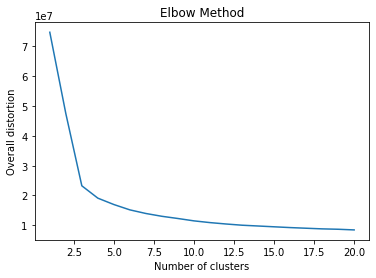

In [33]:
## Figuring out the number of clusters that is optimal for the dataset - i.e. as high as 
distortions = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    
# Plot the relationship between the distortion and k. Then, we can have the Elbow method to help identify a good value for k.
plt.plot(range(1, 21), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Overall distortion')
plt.show()

As can be seen, distortion decreases with the increase of K, but k = 15 is reasonably good

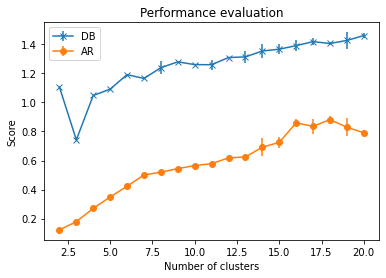

In [34]:
# Let's evaluate the learned model with other quality criteria
y_pred = kmeans.predict(X)
# Internal evaluation, davies bouldin score (the lower, the better)
db_scores = []
db_scores_std = []

# External evaluation, adjusted rand index (the higher, the better)
ar_scores = []
ar_scores_std = []

# Inertia (average standardized)
inertia = []
inertia_std = []

for i in range(2, 21):
    # Multiple runs for stable indicators
    db_scores_tmp = []
    ar_scores_tmp = []
    inertias_tmp = []
    
    n_iteration=5
    for j in range(0, n_iteration):
        kmeans = KMeans(n_clusters=i, init='random', max_iter=300)
        kmeans.fit(X)
        labels = kmeans.labels_
        db_scores_tmp.append(davies_bouldin_score(X, labels))
        ar_scores_tmp.append(adjusted_rand_score(labels, y_pred))
        inertias_tmp.append(math.sqrt(kmeans.inertia_/X.shape[0]))
    
    db_scores.append(np.mean(db_scores_tmp))
    db_scores_std.append(np.std(db_scores_tmp))
    ar_scores.append(np.mean(ar_scores_tmp))
    ar_scores_std.append(np.std(ar_scores_tmp))
    inertia.append(np.mean(inertias_tmp))
    inertia_std.append(np.std(inertias_tmp))

# Plot the relationship between the davies bouldin score and k
plt.errorbar(range(2, 21), db_scores, yerr=db_scores_std, marker='x', label='DB')
plt.errorbar(range(2, 21), ar_scores, yerr=ar_scores_std, marker='o', label='AR')
plt.title('Performance evaluation')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()



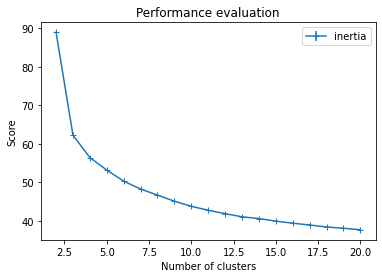

In [35]:
## Seperate graph for intertia to increase visibility of DB and AR on other graph

plt.errorbar(range(2, 21), inertia, yerr=inertia_std, marker='+', label='inertia')
plt.title('Performance evaluation')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

Davies Bouldin and A Rand scores also scored quite well at 15 clusters.

In [29]:
kmeans = KMeans(n_clusters=15, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
scores=davies_bouldin_score(X, labels)
print('\n davies_bouldin_score: %f\n' % scores)


 davies_bouldin_score: 1.358878



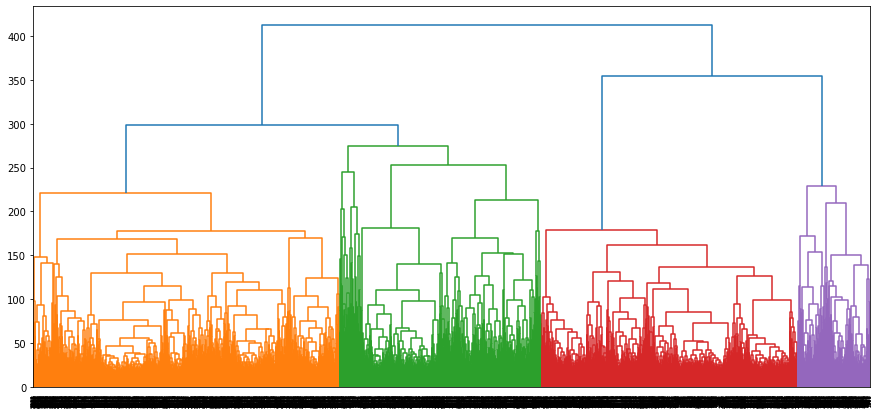

In [154]:
# a dendrogram is appropriate for such high dimensional data

dist = pdist(X, 'euclidean')
linkage_matrix = linkage(dist, method = 'complete')

plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.show()

The dendrogram displays the data clustering relatively clearly, although it isn't immediately visually obvious that the data is intended to be classified into 7 classes.


 After dimension reduction: (6000, 6)



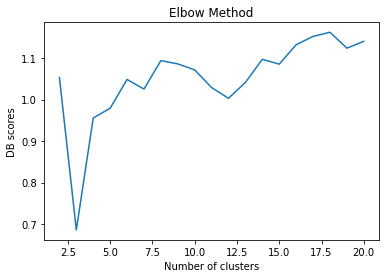

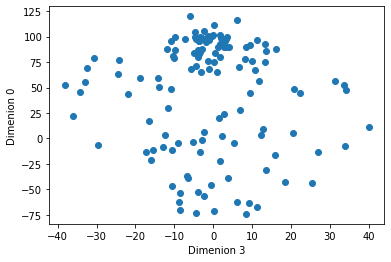

In [26]:
# We also have the option of performing a PCA dimension reduction if we'd like to see a scatterplot of a randomly
# selected 2d array, with x and y being random dimensions out of our 36 features

y = data.Label

from sklearn.decomposition import PCA
pca = PCA(n_components=int(math.sqrt(X.shape[1])))
X_reduced = pca.fit(X).transform(X)

print('\n After dimension reduction: (%d, %d)\n' % X_reduced.shape)

distortions = []
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_reduced)
    labels = kmeans.labels_
    distortions.append(davies_bouldin_score(X_reduced, labels))
    
# Plot the relationship between the distortion and k
plt.plot(range(2, 21), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('DB scores')
plt.show()

# Visualize the data with randomly chosen 2 dimensions
index_2d=np.random.choice(X_reduced.shape[1], 2, replace=False)
sampled_index = np.random.choice(X_reduced.shape[0], int(0.1*X_reduced.shape[0]), replace=False)
X_sampled = X_reduced[sampled_index]
y_sampled = y[sampled_index]
for i in [1, -1]:
    plt.scatter(X_sampled[y_sampled == i, index_2d[0]], X_sampled[y_sampled == i, index_2d[1]])
plt.xlabel('Dimenion %d' % index_2d[0])
plt.ylabel('Dimenion %d' % index_2d[1])
plt.show()

Interestingly enough, the DB scores after dimensional reduction is performed respond well to an increase in clusters, probably due to the relative density of data benefitting from the increase in categories